In [1]:
import pandas as pd
from upsetplot import plot
import matplotlib.pyplot as plt
import gpplot as gpp
gpp.set_aesthetics(context = 'paper')

In [2]:
#read in datasets with computed peak overlap
DHS_combined = pd.read_csv('../../../Data/DHS/combinedDatasetsDHSOverlap.csv')
ATAC_combined = pd.read_csv('../../../Data/ATAC-seq/combinedDatasetsATACseqOverlap.csv')
ChIP_combined = pd.read_csv('../../../Data/ChIP-seq/combinedDatasetsChIPseqOverlap.csv')

In [3]:
#reformat all data and combine into one df
DHS_combined = DHS_combined[['chromosome','sgRNA Context Sequence','Strand of sgRNA',
                             'sgRNA \'Cut\' Position','DHS','overlap with peak']].drop_duplicates()
DHS_combined = DHS_combined.rename(columns = {'DHS':'Cell Line'})
DHS_combined['Dataset Type'] = 'DHS'

ATAC_combined = ATAC_combined[['chromosome','sgRNA Context Sequence','Strand of sgRNA',
                               'sgRNA \'Cut\' Position','ATACseq','overlap with peak']].drop_duplicates()
ATAC_combined['Dataset Type'] = 'ATACseq'
ATAC_combined = ATAC_combined.rename(columns = {'ATACseq':'Cell Line'})

ChIP_combined[['Dataset Type','Cell Line']] = ChIP_combined['ChIPseq'].str.split('_',expand=True)
ChIP_combined = ChIP_combined[['chromosome','sgRNA Context Sequence','Strand of sgRNA',
                               'sgRNA \'Cut\' Position','Dataset Type','Cell Line','overlap with peak']].drop_duplicates()

peak_overlap_df = pd.concat([DHS_combined,ATAC_combined,ChIP_combined]).reset_index(drop=True)
peak_overlap_df

,chromosome,sgRNA Context Sequence,Strand of sgRNA,sgRNA 'Cut' Position,Cell Line,overlap with peak,Dataset Type
0,chr3,CAGAAAAAAAAAAACAGGACACAGGGGAGA,-,45389244.0,A549,0,DHS
1,chr4,ATAAAAAAAAAAAAGGGCACCAAGTGGCCA,+,83285687.0,A549,0,DHS
2,chrX,AATAAAAAAAAAAAGTGATCAGTTTGGAAA,-,70133000.0,A549,0,DHS
3,chr12,AAAAAAAAAAAAAATTAACGTGCCAGGGGC,-,69360661.0,A549,0,DHS
4,chr17,AAAAAAAAAAAAAGCCGTGTGAGCTGGCGG,+,17280422.0,A549,0,DHS
...,...,...,...,...,...,...,...
1952459,chr10,GTTCTTAAAGTGCCTGTCTAATATTGGTTG,+,120856156.0,HCT116,0,H3K4me3
1952460,chr10,GTTCTTAAAGTGCCTGTCTAATATTGGTTG,+,120856156.0,K562,0,H3K4me3
1952461,chr10,GTTCTTAAAGTGCCTGTCTAATATTGGTTG,+,120856156.0,A549,0,H3k27ac
1952462,chr10,GTTCTTAAAGTGCCTGTCTAATATTGGTTG,+,120856156.0,HCT116,0,H3k27ac


In [4]:
#pivot df to prepare for making upset plot
pivoted_peak_overlap = peak_overlap_df.pivot(columns = 'Dataset Type',
                                             index = ['sgRNA Context Sequence','Cell Line'],
                                             values = 'overlap with peak').reset_index().dropna()
pivoted_peak_overlap

Dataset Type,sgRNA Context Sequence,Cell Line,ATACseq,DHS,H3K4me3,H3k27ac
0,AAAAAAAAAAAAAAATTAGTCGTAGGGTGG,A549,1.0,0.0,1.0,1.0
2,AAAAAAAAAAAAAAATTAGTCGTAGGGTGG,HCT116,0.0,0.0,0.0,1.0
4,AAAAAAAAAAAAAAATTAGTCGTAGGGTGG,K562,1.0,0.0,1.0,0.0
7,AAAAAAAAAAAAAATTAACGTGCCAGGGGC,A549,0.0,0.0,1.0,1.0
9,AAAAAAAAAAAAAATTAACGTGCCAGGGGC,HCT116,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...
854191,TTTTTTTTTTTTCAGGATATGGATTGGGAA,HCT116,1.0,0.0,1.0,1.0
854193,TTTTTTTTTTTTCAGGATATGGATTGGGAA,K562,1.0,0.0,1.0,1.0
854196,TTTTTTTTTTTTTTTTTCGGTCACTGGCCT,A549,0.0,0.0,0.0,1.0
854198,TTTTTTTTTTTTTTTTTCGGTCACTGGCCT,HCT116,0.0,0.0,1.0,1.0


In [5]:
#create df to make upset plot
plot_df = pivoted_peak_overlap[['ATACseq','DHS','H3K4me3','H3k27ac']].value_counts()
plot_df

ATACseq  DHS  H3K4me3  H3k27ac
1.0      0.0  1.0      1.0        155019
         1.0  1.0      1.0         77330
0.0      0.0  1.0      1.0         45260
              0.0      0.0         42002
              1.0      0.0          9719
              0.0      1.0          7319
1.0      1.0  1.0      0.0          6804
              0.0      0.0          4780
         0.0  1.0      0.0          4421
0.0      1.0  1.0      1.0          3763
1.0      1.0  0.0      1.0          3618
         0.0  0.0      1.0          2464
                       0.0          1928
0.0      1.0  0.0      0.0           768
                       1.0           474
              1.0      0.0           418
dtype: int64

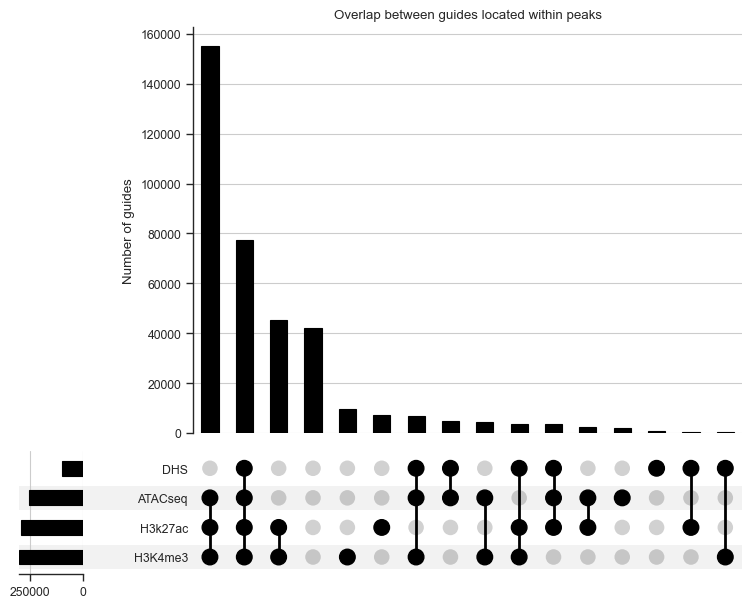

In [6]:
fig = plt.figure(figsize = (20,5))
plot(plot_df,fig=fig,intersection_plot_elements=12,sort_by='cardinality')
plt.title('Overlap between guides located within peaks')
plt.ylabel('Number of guides')
gpp.savefig('../../../Figures/Figure 3/chromatin_accessibility_peak_overlap.pdf',dpi=300,bbox_inches='tight')